# Graph Visualization

In [1]:
%matplotlib notebook

In [68]:
#imports 
import json
import requests
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import pprint as pprint
from opencage.geocoder import OpenCageGeocode

In [70]:
from config import geokey

In [77]:
# cleaned data file to be saved
cleanData = "../data/cleanData/zl_clean_data.csv"
cityData = "../data/cleanData/zl_city_data.csv"
visualizationData = "../data/vizData/zl_clean_data.csv"

# path csv file location
pathCleanData ="../datacleanData/"

In [4]:
#Pull clean data
#calling the csv cleanData folder
cleansed_data_df = pd.read_csv(cleanData)
cleansed_data_df.head()

,Job Posting ID,Job Title,Category,Company Name,City,State,Country,Lat,Lng,LatLng
0,1312805093,Physician: Family Physician Job Opening in Ups...,Healthcare & Nursing Jobs,CompHealth,Clayton,New York,United States,44.239491,-76.085776,"44.239490999999994,-76.085776"
1,1312805901,Physician: Urology Need in Western Ohio with L...,Healthcare & Nursing Jobs,CompHealth,Sunbury,Ohio,United States,40.305232,-82.824785,"40.305232000000004,-82.82478499999998"
2,1328241931,Physician: Internal Medicine Physician Job in ...,Healthcare & Nursing Jobs,CompHealth,Cheshire,Connecticut,United States,41.508367,-72.910620,"41.508367,-72.91062"
3,1334502463,Physician: A Locums Otolaryngologist Is Wanted...,Healthcare & Nursing Jobs,CompHealth,Marion,Illinois,United States,37.730605,-88.933126,"37.730605,-88.933126"
4,1312805719,"Physician: Hospitalist needed in Hartford, CT ...",Healthcare & Nursing Jobs,CompHealth,Cromwell,Connecticut,United States,41.601859,-72.657316,"41.60185900000001,-72.65731600000002"


In [5]:
#Lowercase all column names 
cleansed_data_df.columns = map(str.lower, cleansed_data_df.columns)
cleansed_data_df.head()

,job posting id,job title,category,company name,city,state,country,lat,lng,latlng
0,1312805093,Physician: Family Physician Job Opening in Ups...,Healthcare & Nursing Jobs,CompHealth,Clayton,New York,United States,44.239491,-76.085776,"44.239490999999994,-76.085776"
1,1312805901,Physician: Urology Need in Western Ohio with L...,Healthcare & Nursing Jobs,CompHealth,Sunbury,Ohio,United States,40.305232,-82.824785,"40.305232000000004,-82.82478499999998"
2,1328241931,Physician: Internal Medicine Physician Job in ...,Healthcare & Nursing Jobs,CompHealth,Cheshire,Connecticut,United States,41.508367,-72.910620,"41.508367,-72.91062"
3,1334502463,Physician: A Locums Otolaryngologist Is Wanted...,Healthcare & Nursing Jobs,CompHealth,Marion,Illinois,United States,37.730605,-88.933126,"37.730605,-88.933126"
4,1312805719,"Physician: Hospitalist needed in Hartford, CT ...",Healthcare & Nursing Jobs,CompHealth,Cromwell,Connecticut,United States,41.601859,-72.657316,"41.60185900000001,-72.65731600000002"


In [36]:
#Set job posting id as index
cleansed_data = cleansed_data_df.set_index('job posting id')
cleansed_data.head()

,job title,category,company name,city,state,country,lat,lng,latlng
job posting id,,,,,,,,,
1312805093,Physician: Family Physician Job Opening in Ups...,Healthcare & Nursing Jobs,CompHealth,Clayton,New York,United States,44.239491,-76.085776,"44.239490999999994,-76.085776"
1312805901,Physician: Urology Need in Western Ohio with L...,Healthcare & Nursing Jobs,CompHealth,Sunbury,Ohio,United States,40.305232,-82.824785,"40.305232000000004,-82.82478499999998"
1328241931,Physician: Internal Medicine Physician Job in ...,Healthcare & Nursing Jobs,CompHealth,Cheshire,Connecticut,United States,41.508367,-72.910620,"41.508367,-72.91062"
1334502463,Physician: A Locums Otolaryngologist Is Wanted...,Healthcare & Nursing Jobs,CompHealth,Marion,Illinois,United States,37.730605,-88.933126,"37.730605,-88.933126"
1312805719,"Physician: Hospitalist needed in Hartford, CT ...",Healthcare & Nursing Jobs,CompHealth,Cromwell,Connecticut,United States,41.601859,-72.657316,"41.60185900000001,-72.65731600000002"


In [51]:
#Group by Category and find the top Categories for job postings
cat_grouped = cleansed_data.groupby(['category']).count()
cat_grouped = cat_grouped.reset_index()
cat_grouped_asc = cat_grouped.sort_values(by='category', ascending=True)
cat_grouped_asc

,category,job title,company name,city,state,country,lat,lng,latlng
0,Accounting & Finance Jobs,1,1,1,1,1,1,1,1
1,Customer Services Jobs,17,17,17,17,17,17,17,17
2,Healthcare & Nursing Jobs,303,303,303,303,303,303,303,303
3,Logistics & Warehouse Jobs,102,102,102,102,102,102,102,102
4,Other/General Jobs,527,527,527,527,527,527,527,527
5,Retail Jobs,1,1,1,1,1,1,1,1
6,Sales Jobs,2,2,2,2,2,2,2,2


In [56]:
#Group by City and state to find the top 5 cities that have job postings
grouped_city = cleansed_data.groupby(['city','state']).count()
grouped_city = grouped_city.reset_index()
grouped_city_desc = grouped_city.sort_values(by='job title', ascending=False)
grouped_city_desc.head()

,city,state,job title,category,company name,country,lat,lng,latlng
46,Chicago,Illinois,137,137,137,137,137,137,137
124,Henderson,Nevada,89,89,89,89,89,89,89
230,Philadelphia,Pennsylvania,64,64,64,64,64,64,64
24,Boston,Massachusetts,62,62,62,62,62,62,62
96,Farmington,California,13,13,13,13,13,13,13


In [45]:
#Group by state to find the top 5 states that offer jobs
grouped_state = cleansed_data.groupby(['state']).count()
grouped_state = grouped_state.reset_index()
grouped_state_desc = grouped_state.sort_values(by='job title', ascending=False)
grouped_state_desc.head()

,state,job title,category,company name,city,country,lat,lng,latlng
11,Illinois,225,225,225,225,225,225,225,225
19,Massachusetts,145,145,145,145,145,145,145,145
26,Nevada,113,113,113,113,113,113,113,113
36,Pennsylvania,102,102,102,102,102,102,102,102
3,California,65,65,65,65,65,65,65,65


In [73]:
#Find the cities lat and lng 
city_state = grouped_city_desc[['city','state']].sort_values(by='city', ascending=True)
city_state

,city,state
0,Alameda,California
1,American Canyon,California
2,Anderson,Indiana
3,Antioch,Illinois
4,Apache Junction,Arizona
...,...,...
322,Worthington,Ohio
323,Wyoming,Delaware
324,Wytheville,Virginia
325,Yacolt,Washington


In [74]:
#Connecting to Opencage API to get the lat and lnt of cities
key = geokey  # get api key from:  https://opencagedata.com

#url and key combined
geocoder = OpenCageGeocode(key)

In [85]:
#iterrating to get the items

list_city_lat = []   # create empty lists

list_cityt_lng = []

for index, row in city_state.iterrows(): # iterate over rows in dataframe

    City = row['city']
    State = row['state']       
    query = str(City)+','+str(State)

    results = geocoder.geocode(query)   
    city_lat = results[0]['geometry']['lat']
    cityt_lng = results[0]['geometry']['lng']

    list_city_lat.append(city_lat)
    list_cityt_lng.append(cityt_lng)

# create new columns from lists    

city_state['lat'] = list_city_lat   
city_state['lng'] = list_cityt_lng
city_state

,city,state,lat,lon,lng
0,Alameda,California,37.609029,-121.899142,-121.899142
1,American Canyon,California,38.223457,-122.227043,-122.227043
2,Anderson,Indiana,40.105320,-85.680254,-85.680254
3,Antioch,Illinois,42.477242,-88.095640,-88.095640
4,Apache Junction,Arizona,33.415048,-111.549544,-111.549544
...,...,...,...,...,...
322,Worthington,Ohio,40.093094,-83.017959,-83.017959
323,Wyoming,Delaware,39.118168,-75.558814,-75.558814
324,Wytheville,Virginia,36.947997,-81.086975,-81.086975
325,Yacolt,Washington,45.865504,-122.407031,-122.407031


In [104]:
#Save DF to csv
city_state.to_csv(cityData, index = False)

In [105]:
#calling the csv raw data
city_csv_file = pd.read_csv(cityData)
city_csv_file.head(3)

,city,state,lat,lng
0,Alameda,California,37.609029,-121.899142
1,American Canyon,California,38.223457,-122.227043
2,Anderson,Indiana,40.105320,-85.680254


In [109]:
#grouped city by ascending order
grouped_city_asc = grouped_city.sort_values(by='city', ascending=True)
grouped_city_asc.head()

,city,state,job title,category,company name,country,lat,lng,latlng
0,Alameda,California,1,1,1,1,1,1,1
1,American Canyon,California,1,1,1,1,1,1,1
2,Anderson,Indiana,1,1,1,1,1,1,1
3,Antioch,Illinois,1,1,1,1,1,1,1
4,Apache Junction,Arizona,3,3,3,3,3,3,3


<IPython.core.display.Javascript object>


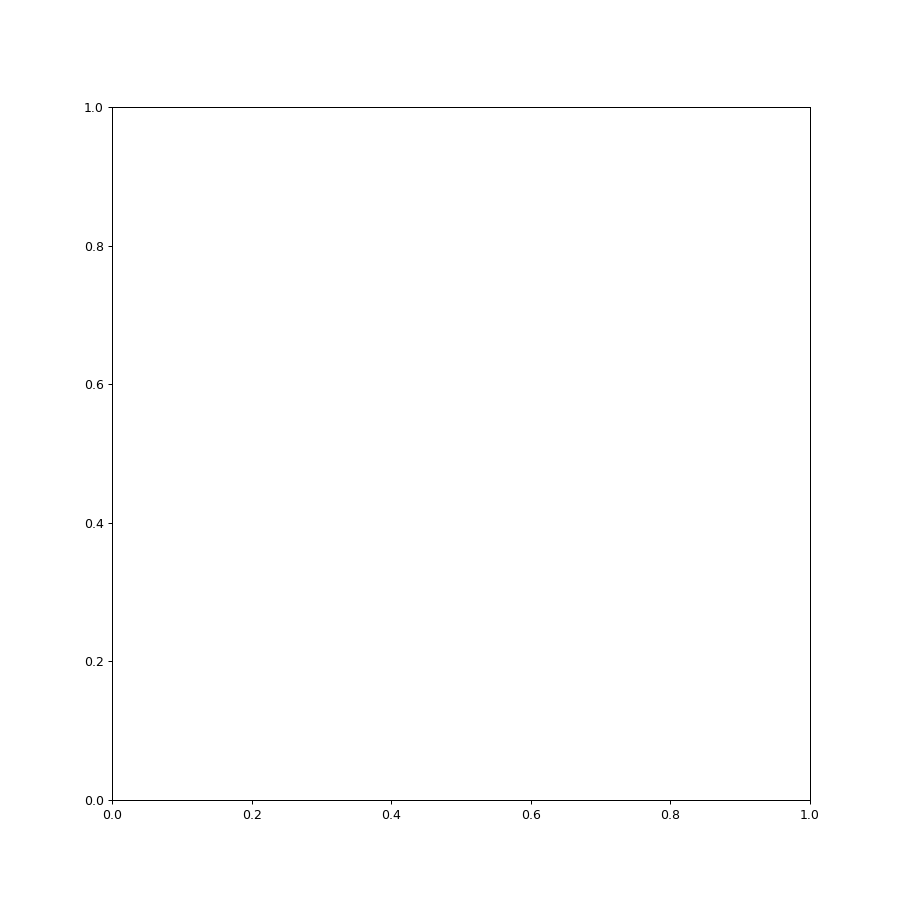

IndexError: tuple index out of range

In [119]:
# city for reproducibility
length = len(grouped_city_asc)

N = grouped_city_asc['job title']
x = city_csv_file['lat']
y = city_csv_file['lng']
colors = length
area = (30 * 300)**2  # 0 to 15 point radii
plt.figure(figsize=(10,10))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.grid()
plt.show()

In [ ]:
#The number of bar graphgs
x_axis = np.arange(len(grouped))

#Grid and size of the plt
plt.figure(figsize=(10,10))
plt.grid()

plt.bar(x_axis, cat_grouped["job title"], color='b', alpha=0.5, align="center")

plt.xticks(x_axis, cat_grouped["category"], rotation="vertical")



In [7]:
category = cleansed_data['category']
category

job posting id
1312805093     Healthcare & Nursing Jobs
1312805901     Healthcare & Nursing Jobs
1328241931     Healthcare & Nursing Jobs
1334502463     Healthcare & Nursing Jobs
1312805719     Healthcare & Nursing Jobs
                         ...            
1338900671    Logistics & Warehouse Jobs
1320153715     Healthcare & Nursing Jobs
1338909279    Logistics & Warehouse Jobs
1312808260     Healthcare & Nursing Jobs
1338901433    Logistics & Warehouse Jobs
Name: category, Length: 953, dtype: object

In [8]:
category.unique()

array(['Healthcare & Nursing Jobs', 'Other/General Jobs',
       'Customer Services Jobs', 'Sales Jobs', 'Retail Jobs',
       'Logistics & Warehouse Jobs', 'Accounting & Finance Jobs'],
      dtype=object)

In [9]:
cat_count = category.count()

<IPython.core.display.Javascript object>


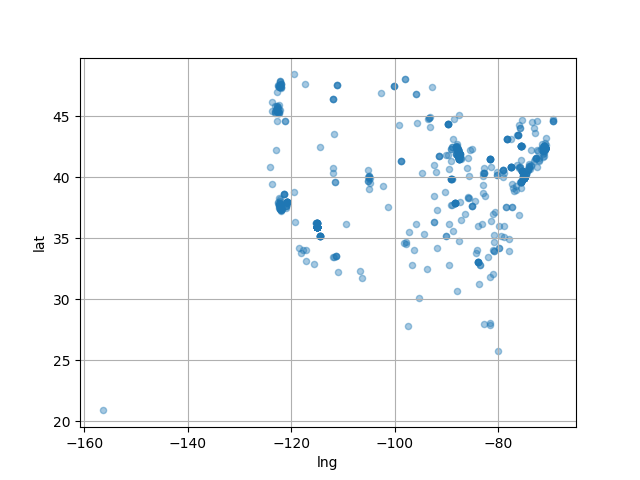

In [10]:
# function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, 
#                                    vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, 
#                                    plotnonfinite=False, data=None, **kwargs)>
cleansed_data.plot(kind="scatter", x="lng", y="lat", alpha=0.4)
plt.grid()
plt.show()

In [54]:
lat = cleansed_data['lat'].to_numpy
lat

<bound method IndexOpsMixin.to_numpy of job posting id
1312805093    44.239491
1312805901    40.305232
1328241931    41.508367
1334502463    37.730605
1312805719    41.601859
                ...    
1338900671    37.772927
1320153715    33.993986
1338909279    37.322998
1312808260    44.391021
1338901433    37.463334
Name: lat, Length: 953, dtype: float64>

In [55]:
# Extract the data we're interested in
lat = cleansed_data['lat'].values
lon = cleansed_data['lng'].values
population = cat_count.to_numpy
area = cities['area_total_km2'].values

fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

AttributeError: 'numpy.int32' object has no attribute 'to_numpy'

<IPython.core.display.Javascript object>


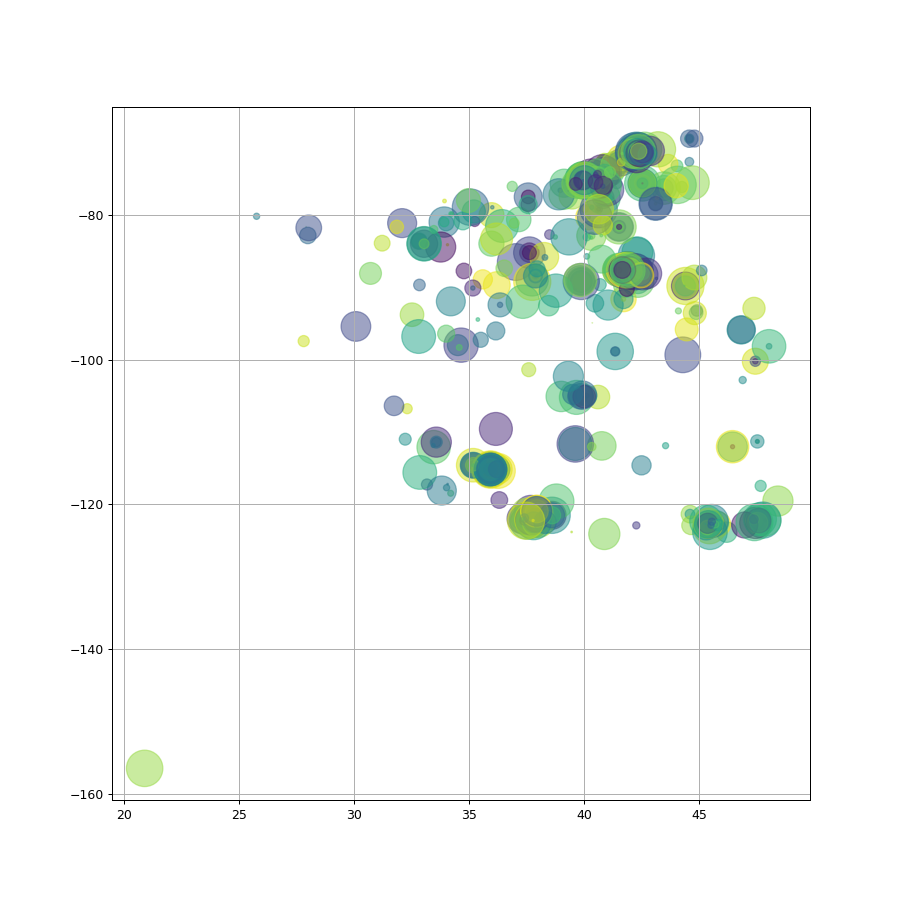

In [21]:
# Fixing random state for reproducibility
np.random.seed(19680801)


N = 953
x = cleansed_data['lat']
y = cleansed_data['lng']
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
plt.figure(figsize=(10,10))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.grid()
plt.show()